# Confidence intervals

In [26]:
# import library
import pickle
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import random
plt.rcParams["figure.figsize"] = (20,15)
# plt.rcParams["figure.figsize"] = (10,10)

# open the file of interest, and use pickle loading
infile = open ("lab6/qcd_100000_pt_250_500.pkl",'rb') # signal dataset
qcd = pickle.load(infile)
infile = open ("lab6/higgs_100000_pt_250_500.pkl",'rb') # background dataset
higgs = pickle.load(infile)

# list all keys of the files
print(qcd.keys())
print(higgs.keys())
print(len(qcd))

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
100000


## Setup

100000
100000


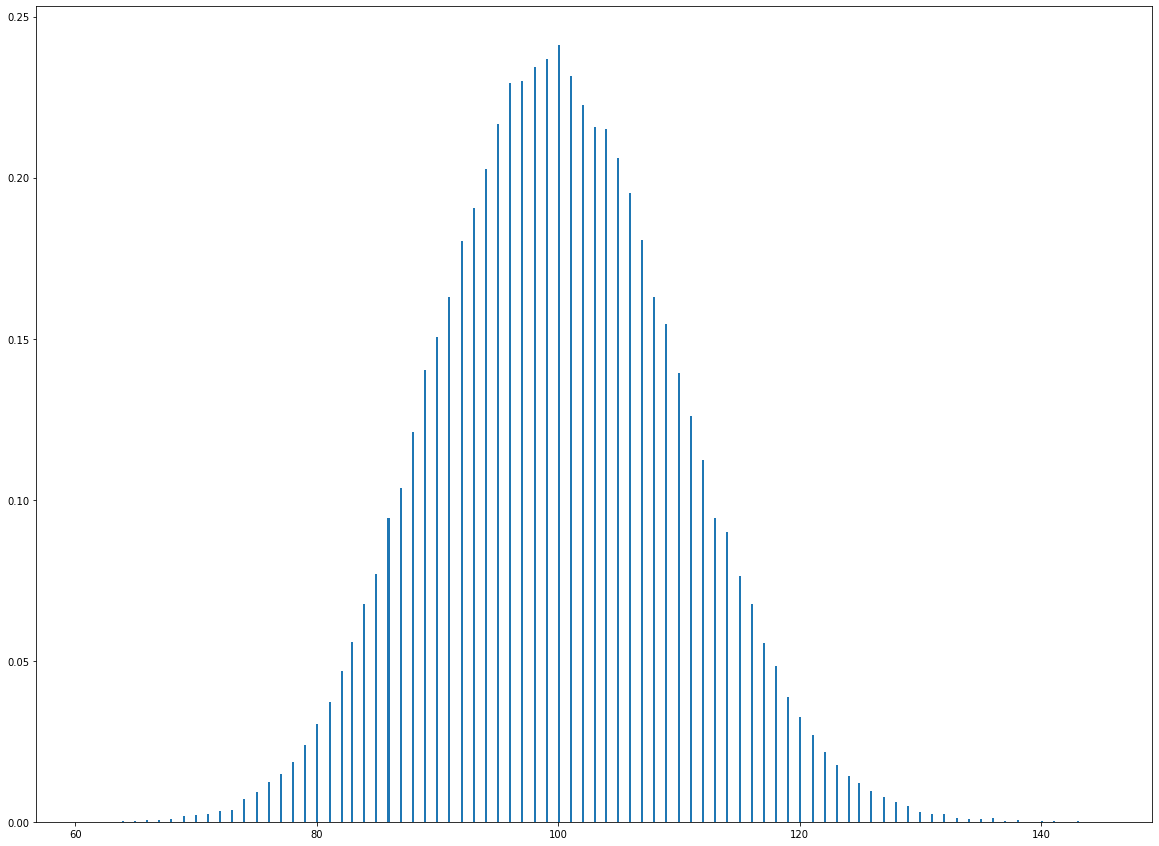

In [66]:
mu = 100
# print(higgs)
size = len(higgs['eta'])
print(size)
print(len(higgs['pt']))
simBG = stats.poisson.rvs(mu, size=size)
plt.hist(simBG, 500, density=True)
plt.show()

We are simulating 100,000 data points of a Poisson distribution but it seems from this simulation that we are getting a normal distribution. This is a result of the Central Limit Theorem that states as we increase the sample size every dataset of a certain distribution becomes more normal. Thus, this simulation of 100,000 datapoints adheres Central Limit Theorem and becomes Gaussian. We also set the mean of this simulated background to be aroun 100.

## Problem 1

In [67]:
fiveSig = 1 - stats.norm.cdf(5)
print(fiveSig)
fiveSigPoint = stats.poisson.ppf(1 - fiveSig, mu)
print(fiveSigPoint)
print('The point of 5\u03C3 is ', fiveSigPoint)

2.866515719235352e-07
154.0
The point of 5σ is  154.0


## Problem 2

### a)

Injection value:  190.0


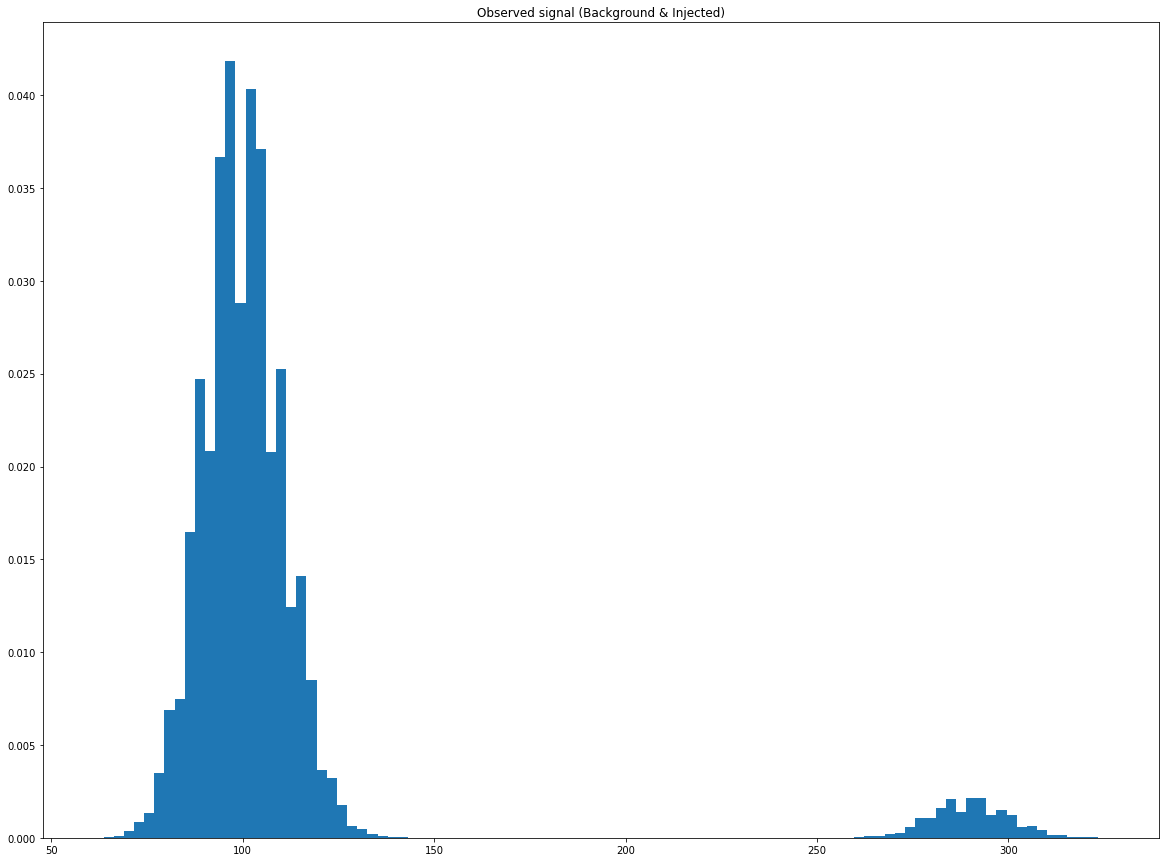

In [68]:
eightSig = 1 - stats.norm.cdf(8)
sigValue = stats.poisson.ppf(1 - eightSig, mu)
print('Injection value: ', sigValue)
for i in range(0, 100000, 20):
    num = random.randint(0,19)
    simBG[i + num] = simBG[i + num] + sigValue
# one way is adding the datasets of new dataset
# injected = stats.poisson.rvs(mu, sigValue, size=10000)
# what = np.append(simBG, injected)
plt.hist(simBG, 100, density=True)
plt.title('Observed signal (Background & Injected)')
plt.show()

The background distribution is of a Poisson distribution with a mean of 100 and to this background we injected a signal of 8$\sigma$ to 5% of the background randomly. I calculated 8$\sigma$ by finding the probability of 8$\sigma$ on a normal distribution and then finding at what point in this Poisson background distribution there is a probability of this calculated 8$\sigma$ value. I "randomly" added the signal to the background by adding the signal value to a random datapoint every 20 values in the dataset so that 5000 or 5% of the values are affected by injected signal.

The histogram of the injected signal takes the shape of the background of a Poisson distribution however that is very difficult to see due to the CLT taking place in the background. Both histograms (background & signal) look very Gaussian. The histogram is telling us that for a signal of value 190 their is a backgroung that follows that is Gaussian and has a mean of 100. What the distribution of the signal values tells you is the range of values you would observe if you performed the same measurement many times.

### b)

Whether an observed signal is biased or unbiased is a discussion about if yourobserved signal is where you expect it to be knowing the value of your injected signal. If we see that the observed signal is distributed around the injected signal value then we can say it is unbiased, otherwise it is said to be biased. In our example our injected signal of 8 sigma is at 190 and so we would expect the observed signal to be distributed around 190 if it was unbiased. However, we see that the observed signal is distributed around 290 and thus it is a biased signal and is a result of the mean of the background distribution at 100. For example, if the mean of the background distribution was at 0 then we could expect the observed signal to be distributed around 190.

## Problem 3 Make a suite of injected signals

Make a suite of injected signals that range from 0$\sigma$ to a $\sigma$ value well above 5$\sigma$

### a)

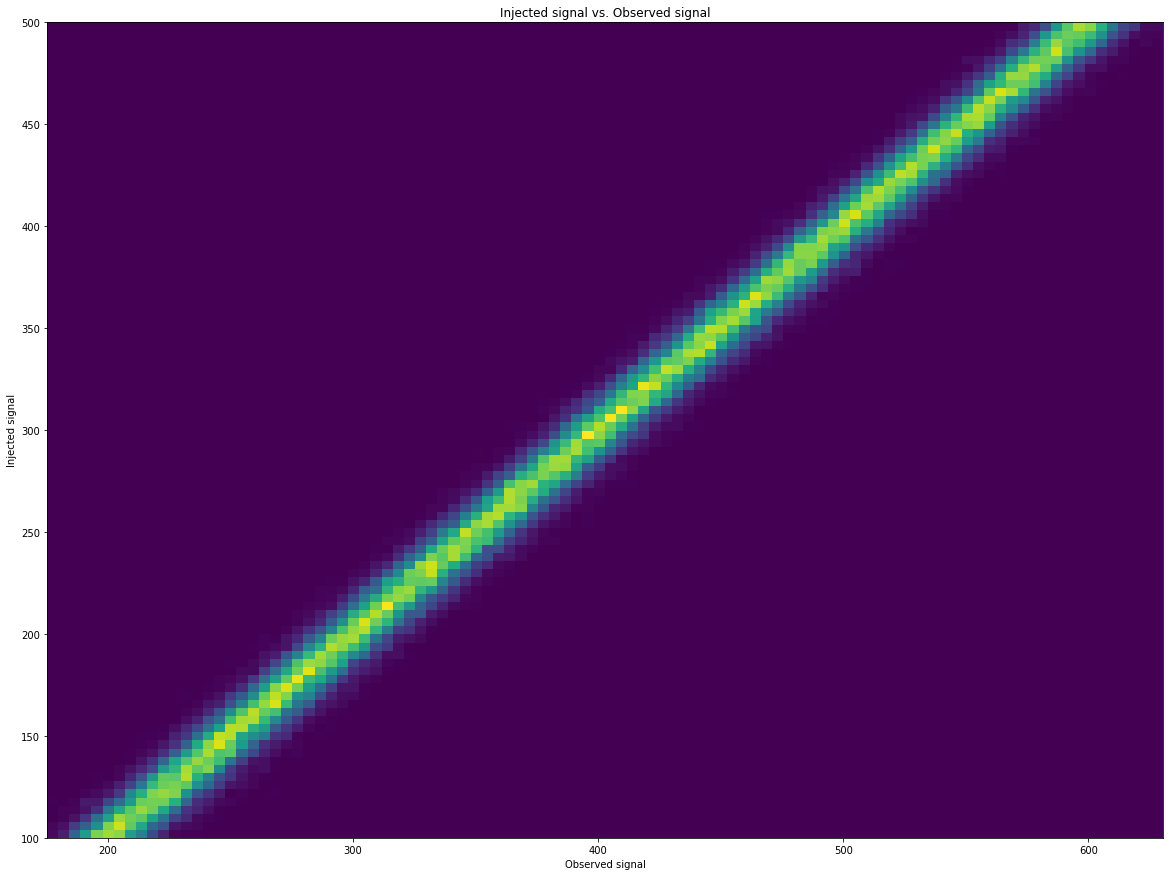

In [69]:
simData = stats.poisson.rvs(mu, size=size)
sig8 = np.ones(size) * sigValue
simData = simData + injSig

plt.hist2d(simData, injSig, bins=(100,100), density=True)
plt.title('Injected signal vs. Observed signal')
plt.ylabel('Injected signal')
plt.xlabel('Observed signal')
plt.show()

In this problem we are looking for a suite of injected signals from 0$\sigma$ to above 30$\sigma$ instead of just one $\sigma$ value. However one difficulty we found was that when you calculated the probability of any $\sigma$ above 8$\sigma$ and then used this value to find where a certain sigma is on the observed distribution it does not work because the $\sigma$ when it is larger than 8$\sigma$ is so small that when you use ppf to find where the distribution has a probability this small it returns infinity. Thus we will just take the 0$\sigma$ value of 100 and call the end sigma range to be at 650 which is well beyond 290, the 8$\sigma$ value point on the distribution.

The histogram above is a 2-dimensional histogram and thus explains a different story than a 1-dimensional histogram. The above histogram represents the probability distribution of injected signals given the strengh of an observed signal so for example with an observed signal of around 300 we found the injected signal to be in a range of 180-220. Essentially we simulated the injected signals from a range of 0$\sigma$ to >30$\sigma$ and added it to the simulated background to find the distribution of possible injected signals given an observational signal.

### b) Show that you get the same answer if you choose the injected signal in problem 2.

190


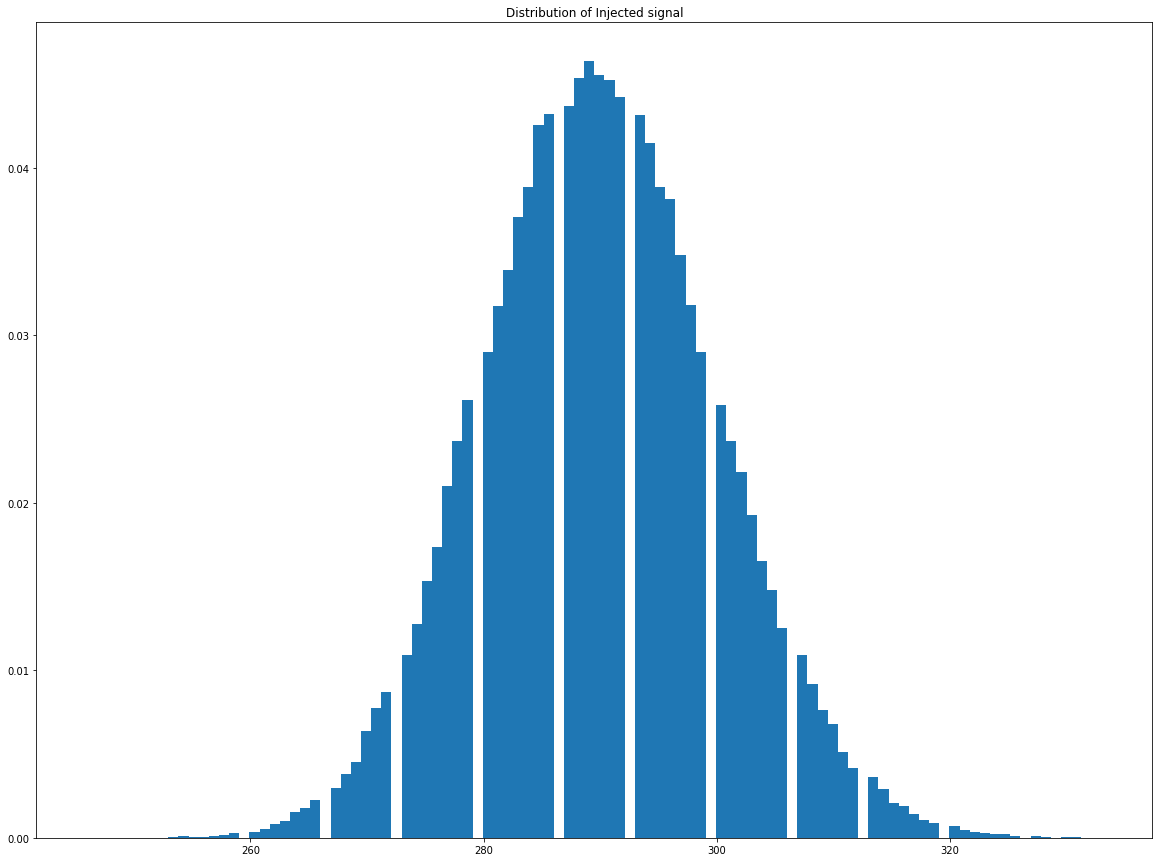

In [76]:
simData = stats.poisson.rvs(mu, size=size)
prevInj = 190
sig8Check = np.ones(size) * prevInj
print(prevInj)
injDist = sig8Check + simData
plt.hist(injDist, bins=100, density=True)
plt.title('Distribution of Injected signal')
plt.show()

As found in problem 2 when you have an injected signal of 190, or 8$\sigma$, you get a background signal distribution centered around 290. Thus we might expect similar behavior in this 2-dimensional histogram and this is what we will be looking for. Knowing the injected signal is 190 I add this value to every datapoint in the simulated background dataset. After doing this and plotting the new dataset on a histogram I see I get a realtively Gaussian distribution centered about 290 which is what we were expecting from an injected signal of 290 and thus this follows the results of problem 2.

On a more higher level understanding what we just did is determine the observed signal strength given an injected signal strength and the background noise. Thus our findings intuitively makes sense that the signal strength of the injected signal plus the background gives us our observed signal distribution as that would sum te noise and signals in our data to give us the sum, observed signal.

### c) Select an observed signal and create a 1D histogram of the injected signal pdf.

290


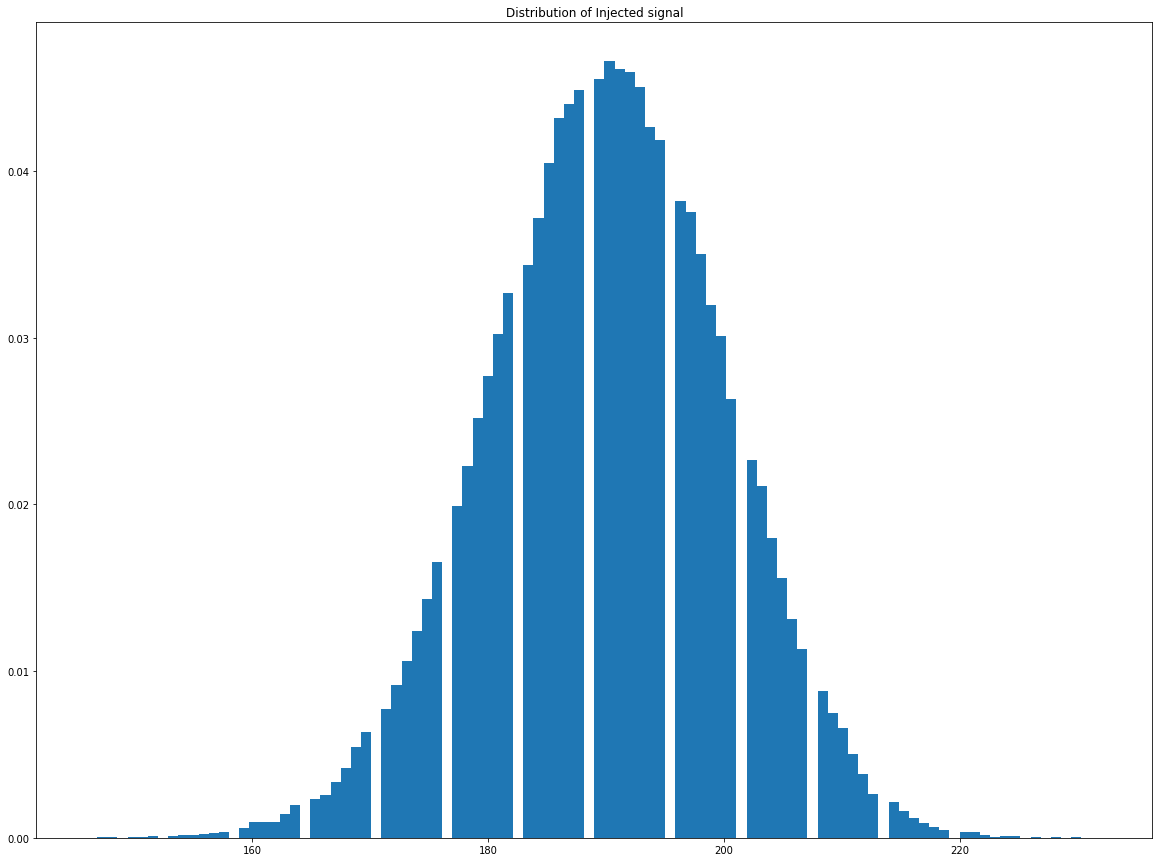

In [77]:
simData = stats.poisson.rvs(mu, size=size)
prevObs = 290
sig8Check = np.ones(size) * prevObs
print(prevObs)
injDist = sig8Check - simData
plt.hist(injDist, bins=100, density=True)
plt.title('Distribution of Injected signal')
plt.show()

As found in problem 2 when you have an injected signal of 190, or 8$\sigma$, you get a background signal distribution centered around 290. Thus we might expect similar behavior in this 2-dimensional histogram and this is what we will be looking for. Thus I get the observed signal by getting a dataset of 290, which is the observed value, and we subtract this by the simulated background distribution. This gives us a distribution of injected signals that is centered around 190, or 5$\sigma$, meaning that if we choose the same injected signal power as in problem 2 we do indeed get the same answer for background.

On a more higher level understanding what we just did is determine the injected signal strength given a observed signal strength and the background noise. Thus our findings intuitively makes sense that the distribution of observed signals minus the background gives us our signal distribution as that would get rid of noise in our observed data.

### d) For your observed signal, what is the 1LaTeX: \sigmaσ uncertainty on the true signal strength?

In [78]:
sigma1 = 1 - stats.norm.cdf(1)
fiveSigPoint = stats.poisson.ppf(1 - fiveSig, 290)
print(fiveSigPoint)

379.0


### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

## Problem 4